### Import the Packages

In [28]:
import pandas as pd 
import numpy as np
#import matplotlib.pyplot as plt 
#import seaborn as sns
#sns.set()

### Importing the Data

In [41]:
raw_csv_data = pd.read_csv("C:/Users/gadugoil/Downloads/Index2018.csv")

In [42]:
# copy the dataframe

In [43]:
df_comp = raw_csv_data.copy()

### Examining the Data

In [44]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,7/1/1994,469.90,2224.95,3445.98,18124.01
1,10/1/1994,475.27,2225.00,3440.58,18443.44
2,11/1/1994,474.13,2228.10,3413.77,18485.25
3,12/1/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [45]:
df_comp

,date,spx,dax,ftse,nikkei
0,7/1/1994,469.900000,2224.95,3445.980000,18124.01
1,10/1/1994,475.270000,2225.00,3440.580000,18443.44
2,11/1/1994,474.130000,2228.10,3413.770000,18485.25
3,12/1/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [46]:
df_comp.columns

Index(['date', 'spx', 'dax', 'ftse', 'nikkei'], dtype='object')

In [51]:
df_comp['date']=pd.to_datetime(df_comp['date'])

In [52]:
df_comp.set_index('date', inplace=True)

In [53]:
# date as index

In [54]:
df_comp.columns

Index(['spx', 'dax', 'ftse', 'nikkei'], dtype='object')

In [55]:
df_comp.index

DatetimeIndex(['1994-07-01', '1994-10-01', '1994-11-01', '1994-12-01',
               '1994-01-13', '1994-01-14', '1994-01-17', '1994-01-18',
               '1994-01-19', '1994-01-20',
               ...
               '2018-01-16', '2018-01-17', '2018-01-18', '2018-01-19',
               '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25',
               '2018-01-26', '2018-01-29'],
              dtype='datetime64[ns]', name='date', length=6269, freq=None)

In [56]:
#showcase entire dataset Market Indexes of most traded companies 
# spx-USA, dax- Germany, ftse-London(UK). nikkei-Japan

In [57]:
# to understand data better

In [58]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [59]:
# missing values

In [60]:
# no of missing elements

In [61]:
df_comp.spx.isna().sum()

0

### Plotting the Data

In [62]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'S&P500 Prices'}, xlabel='date'>

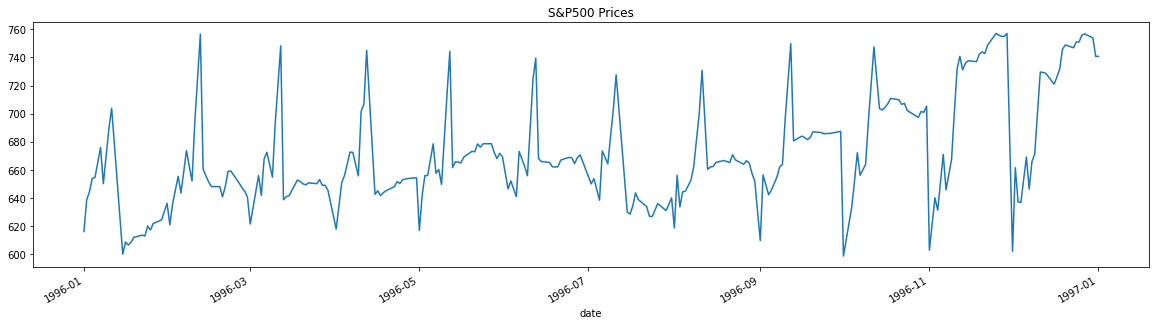

In [84]:
df_comp.spx.loc['1996-01-01':'1997-01-01'].plot(figsize=(20,5), title = "S&P500 Prices")

<AxesSubplot:title={'center':'S&P500 Prices'}, xlabel='date'>

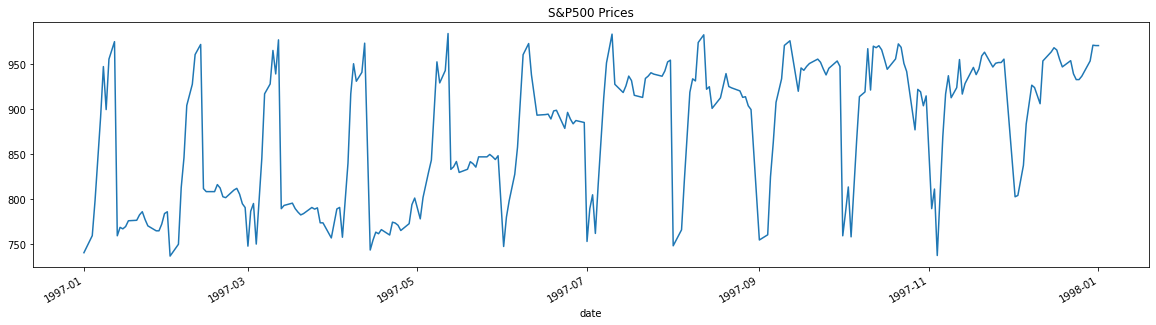

In [91]:
df_comp.spx.loc['1997-01-01':'1998-01-01'].plot(figsize=(20,5), title = "S&P500 Prices")

In [20]:
# peaks followed by falls
# plot other countries market index to see whether they also followed such trends

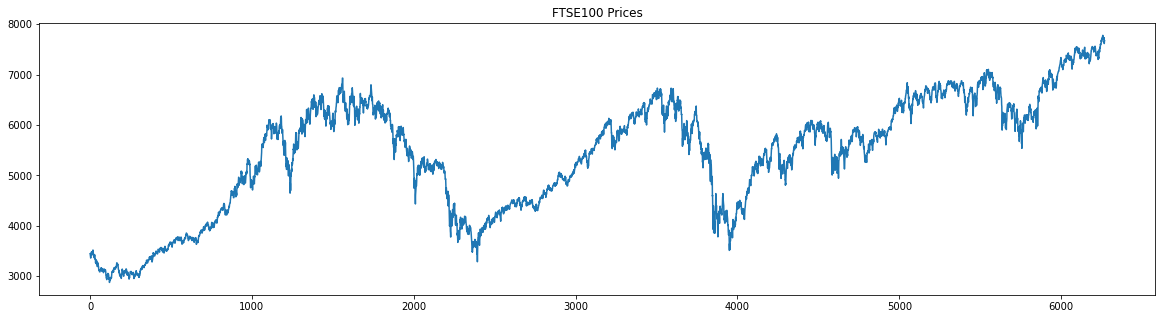

In [89]:
raw_csv_data.ftse.plot(figsize=(20,5), title = "FTSE100 Prices")
plt.show()

In [22]:
# to compare we can put both plots together

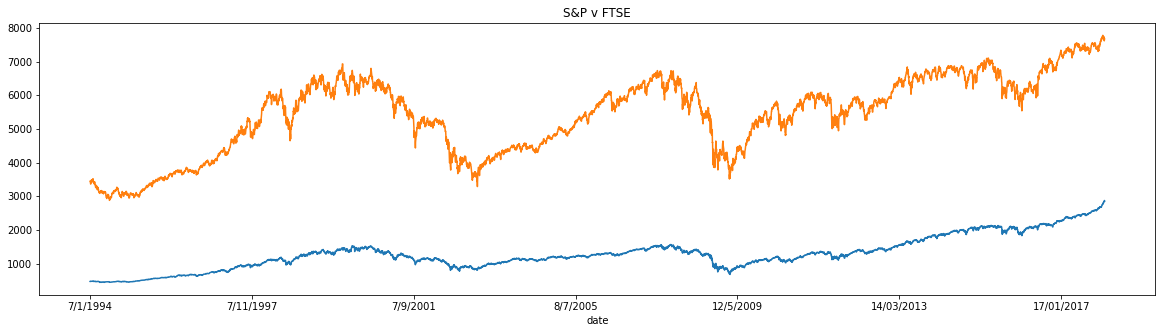

In [23]:
df_comp.spx.plot(figsize=(20,5), title = "S&P500 Prices")
df_comp.ftse.plot(figsize=(20,5), title = "FTSE100 Prices")
plt.title("S&P v FTSE")
plt.show()

In [24]:
# S&P more stable

### The QQ Plot

In [25]:
# Quantile-Quantile plot-used to determine whether a data set is
# distributed a certain way
# how the data fits a normal distribution

In [26]:
import scipy.stats
import pylab

In [27]:
# pylab: 

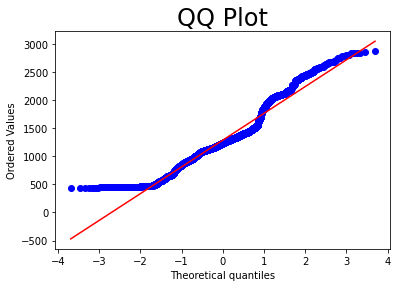

In [57]:
scipy.stats.probplot(df_comp.spx, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

# ADF-TEST

In [87]:
from statsmodels.tsa.stattools import adfuller

In [86]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [88]:
adf_test(df_comp['ftse'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -1.594282
p-value                    0.486465
# lags used                6.000000
# observations          6262.000000
critical value (1%)       -3.431395
critical value (5%)       -2.862002
critical value (10%)      -2.567016
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


# Converting Non-staionary data to stationary data

In [37]:
df_comp['spx_diff']=df_comp['spx'].diff(periods=1)
df_comp.fillna(0,inplace=True)

<AxesSubplot:xlabel='date', ylabel='company indexes'>

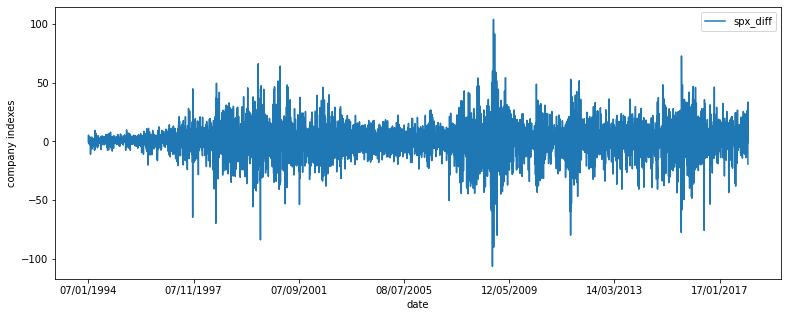

In [90]:
df_comp['spx_diff'].plot(figsize= (13,5), legend= True, ylabel='company indexes')

In [91]:
adf_test(df_comp['spx_diff'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.876936e+01
p-value                 2.025381e-30
# lags used             1.700000e+01
# observations          6.251000e+03
critical value (1%)    -3.431397e+00
critical value (5%)    -2.862002e+00
critical value (10%)   -2.567016e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
